<a href="https://colab.research.google.com/github/Danika-Balas/msds-458/blob/master/458_Assignment1_Expt3_h1-85_h2-range100-800.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup and Preprocessing

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
keras.__version__

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.3.0-tf'

In [2]:
tf.__version__

'2.2.0-rc3'

In [3]:
from keras import metrics

Using TensorFlow backend.


In [0]:
# neccessary for K.gradient to work in TensorFlow 2.x
# only needed for the "Finding a pattern the hidden node maximally responds to" section below.
# but disabled to make Tensorboard work...
tf.compat.v1.disable_eager_execution() 

In [0]:
# Set see in order to achieve consistent results across runs
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

####Import MNIST dataset

In [0]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [8]:
#Store copy of training images in order to easily view images even after transformation are performed
example_train_images = train_images.copy()
example_train_images.shape

(60000, 28, 28)

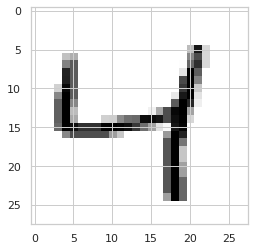

In [9]:
# Example of a single sample, a 28x28 pixel image of a handwritten digit
digit = example_train_images[2]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

####Prepare the data

In [0]:
# Reshape the data into the shape that the network expects
train_images = train_images.reshape((60000, 28 * 28))

# Scale the data to [0,1] interval
train_images = train_images.astype('float32') / 255

# Do the same for the test dataset
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# Split training data into training set and validation set
val_images, train_images = train_images[:5000], train_images[5000:]
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

#Experiment 3

We will fine-tune the hyperparameters of the model until we find the 'best' model according to our selected metrics

In [0]:
# Function builds models with 1 hidden layer (by default), then the same number of nodes in each hidden layer
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(n_hidden=1, n_neurons=2, learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(85, activation="relu"))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [0]:
# This function builds models with varying number of nodes in each hidden layer
def build_model2(n_neurons=(2,3), learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(len(n_neurons)):
        model.add(keras.layers.Dense(n_neurons[layer], activation="relu"))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [0]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_clf = KerasClassifier(build_model)

In [15]:
param_grid = {'n_neurons': range(100,900,100)}
param_grid

{'n_neurons': range(100, 900, 100)}

Use grid search to train models with different combinations of parameter values

In [16]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=keras_clf, param_grid=param_grid,cv=3,verbose = 2)
grid_cv.fit(train_images, train_labels, epochs=30,
                  validation_data=(val_images, val_labels),
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] n_neurons=100 ...................................................
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 36666 samples, validate on 5000 samples
Epoch 1/30
36666/36666 [==============================] - 4s 116us/sample - loss: 0.3631 - accuracy: 0.8916 - val_loss: 0.1634 - val_accuracy: 0.9530
Epoch 2/30
36666/36666 [==============================] - 4s 115us/sample - loss: 0.1609 - accuracy: 0.9509 - val_loss: 0.1463 - val_accuracy: 0.9584
Epoch 3/30
36666/36666 [==============================] - 5s 124us/sample - loss: 0.1172 - accuracy: 0.9650 - val_loss: 0.1112 - val_accuracy: 0.9664
Epoch 4/30
36666/36666 [==============================] - 4s 111us/sample - loss: 0.0911 - accuracy: 0.9714 - val_loss: 0.1061 - val_accuracy: 0.9712
Epoch 5/30
36666/36666 [==============================] - 4s 113us/sample - loss: 0.0747 - accuracy: 0.9757 - val_loss: 0.1072 - val_accuracy: 0.9702
Epoch 6/30
36666/36666 [==============================] - 4s 112us/sample - loss: 0.0634 - accuracy: 0.9789 - val_loss: 0.0883 - val_accuracy: 0.9736
Epoch 7/30
36666/36666 [===========================

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.3s remaining:    0.0s


Train on 36667 samples, validate on 5000 samples
Epoch 1/30
36667/36667 [==============================] - 4s 114us/sample - loss: 0.3594 - accuracy: 0.8951 - val_loss: 0.1573 - val_accuracy: 0.9504
Epoch 2/30
36667/36667 [==============================] - 4s 114us/sample - loss: 0.1580 - accuracy: 0.9535 - val_loss: 0.1284 - val_accuracy: 0.9612
Epoch 3/30
36667/36667 [==============================] - 4s 111us/sample - loss: 0.1117 - accuracy: 0.9669 - val_loss: 0.1038 - val_accuracy: 0.9696
Epoch 4/30
36667/36667 [==============================] - 4s 111us/sample - loss: 0.0875 - accuracy: 0.9717 - val_loss: 0.1061 - val_accuracy: 0.9670
Epoch 5/30
36667/36667 [==============================] - 4s 118us/sample - loss: 0.0711 - accuracy: 0.9768 - val_loss: 0.0927 - val_accuracy: 0.9736
Epoch 6/30
36667/36667 [==============================] - 4s 118us/sample - loss: 0.0585 - accuracy: 0.9813 - val_loss: 0.0878 - val_accuracy: 0.9748
Epoch 7/30
36667/36667 [===========================

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 13.3min finished


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.3002 - accuracy: 0.9099 - val_loss: 0.1242 - val_accuracy: 0.9652
Epoch 2/30
55000/55000 [==============================] - 7s 125us/sample - loss: 0.1329 - accuracy: 0.9601 - val_loss: 0.0926 - val_accuracy: 0.9722
Epoch 3/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.0948 - accuracy: 0.9710 - val_loss: 0.0901 - val_accuracy: 0.9720
Epoch 4/30
55000/55000 [==============================] - 7s 125us/sample - loss: 0.0769 - accuracy: 0.9763 - val_loss: 0.0795 - val_accuracy: 0.9764
Epoch 5/30
55000/55000 [==============================] - 7s 126us/sample - loss: 0.0625 - accuracy: 0.9799 - val_loss: 0.0842 - val_accuracy: 0.9768
Epoch 6/30
55000/55000 [==============================] - 7s 131us/sample - loss: 0.0535 - accuracy: 0.9832 - val_loss: 0.0806 - val_accuracy: 0.9772


GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fb97d4e08d0>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_neurons': range(100, 900, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

##EVALUATE

### Inspecting the best estimator

Let's get the number of neurons that produced the best estimator

In [17]:
grid_cv.best_params_

{'n_neurons': 100}

Let's get the rsults to compare the performance of the 100 models.

In [18]:
results = grid_cv.cv_results_
results

{'mean_fit_time': array([39.33213083, 27.66439589, 30.38062469, 33.84804821, 31.52863121,
        29.59393199, 31.54914172, 33.73468598]),
 'mean_score_time': array([0.97946191, 1.02708848, 1.04404744, 1.0918057 , 1.09962416,
        1.16951474, 1.18433714, 1.21207913]),
 'mean_test_score': array([0.97094546, 0.9679818 , 0.97001817, 0.96981812, 0.96849092,
        0.9665637 , 0.96669098, 0.96514547]),
 'param_n_neurons': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neurons': 100},
  {'n_neurons': 200},
  {'n_neurons': 300},
  {'n_neurons': 400},
  {'n_neurons': 500},
  {'n_neurons': 600},
  {'n_neurons': 700},
  {'n_neurons': 800}],
 'rank_test_score': array([1, 5, 2, 3, 4, 7, 6, 8], dtype=int32),
 'split0_test_score': array([0.97092831, 0.96929204, 0.97081923, 0.97360098, 0.96869206,
        0.96280134, 0.9632377 , 0.96471035])

In [19]:
results['params'], results['rank_test_score']

([{'n_neurons': 100},
  {'n_neurons': 200},
  {'n_neurons': 300},
  {'n_neurons': 400},
  {'n_neurons': 500},
  {'n_neurons': 600},
  {'n_neurons': 700},
  {'n_neurons': 800}],
 array([1, 5, 2, 3, 4, 7, 6, 8], dtype=int32))

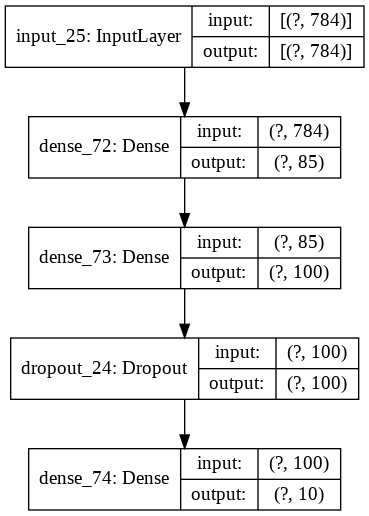

In [20]:
best_model = grid_cv.best_estimator_.model
keras.utils.plot_model(best_model, show_shapes=True)

In [21]:
best_model.evaluate(test_images, test_labels)

[0.08424283909410296, 0.9775]